In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('alstm/alstm.csv')
df.drop('no', axis=1, inplace=True)
df.head()

,n_heads,drop_rate,train_acc,test_acc,train_loss,test_loss,best_model_test_acc,best_model_test_loss,time
0,1,0.0,1.0000,0.906314,0.0002,0.555753,0.885947,0.323924,03:33
1,1,0.2,0.9920,0.914460,0.0268,0.417453,0.914460,0.248300,03:37
2,1,0.4,0.9765,0.936864,0.0669,0.216817,0.934827,0.200531,03:34
3,1,0.6,0.9548,0.934827,0.1401,0.171814,0.930754,0.189725,03:35
4,1,0.8,0.8087,0.920570,0.5304,0.260215,0.920570,0.260215,03:36


In [4]:
df['n_heads'].unique()

array([  1,   2,   3,   5,   6,  10,  15,  25,  30,  50,  75, 150])

In [5]:
df.describe()

,n_heads,drop_rate,train_acc,test_acc,train_loss,test_loss,best_model_test_acc,best_model_test_loss
count,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,31.000000,0.40000,0.960435,0.925560,0.114307,0.331901,0.919416,0.241692
std,42.204105,0.28523,0.050271,0.012529,0.139315,0.148253,0.017279,0.058622
min,1.000000,0.00000,0.808700,0.898167,0.000000,0.171814,0.863544,0.159035
25%,4.500000,0.20000,0.959125,0.916497,0.025250,0.212623,0.912933,0.196481
50%,12.500000,0.40000,0.987550,0.925662,0.041350,0.281433,0.922607,0.220110
75%,35.000000,0.60000,0.992550,0.936864,0.119025,0.391730,0.931263,0.264742
max,150.000000,0.80000,1.000000,0.947047,0.530400,0.771567,0.947047,0.384938


In [6]:
df.shape

(60, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_heads               60 non-null     int64  
 1   drop_rate             60 non-null     float64
 2   train_acc             60 non-null     float64
 3   test_acc              60 non-null     float64
 4   train_loss            60 non-null     float64
 5   test_loss             60 non-null     float64
 6   best_model_test_acc   60 non-null     float64
 7   best_model_test_loss  60 non-null     float64
 8   time                  60 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 4.3+ KB


In [8]:
drop_00 = df[df['drop_rate'] == 0.0]
drop_02 = df[df['drop_rate'] == 0.2]
drop_04 = df[df['drop_rate'] == 0.4]
drop_06 = df[df['drop_rate'] == 0.6]
drop_08 = df[df['drop_rate'] == 0.8]

## Best Model Accuracy Graph

In [17]:
n_heads = df['n_heads'].unique()
n_heads

array([  1,   2,   3,   5,   6,  10,  15,  25,  30,  50,  75, 150])

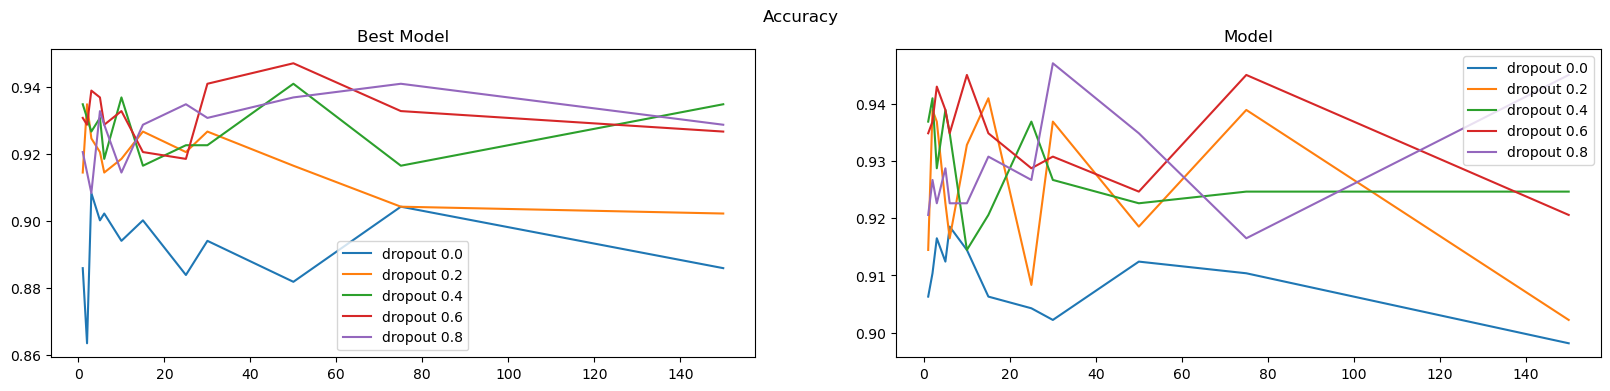

In [10]:
n_heads = df['n_heads'].unique()

plt.figure(figsize=(20,4))
plt.suptitle('Accuracy')
plt.subplot(1, 2, 1)
plt.title('Best Model')
plt.plot(n_heads, drop_00['best_model_test_acc'], label='dropout 0.0')
plt.plot(n_heads, drop_02['best_model_test_acc'], label='dropout 0.2')
plt.plot(n_heads, drop_04['best_model_test_acc'], label='dropout 0.4')
plt.plot(n_heads, drop_06['best_model_test_acc'], label='dropout 0.6')
plt.plot(n_heads, drop_08['best_model_test_acc'], label='dropout 0.8')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Model')
plt.plot(n_heads, drop_00['test_acc'], label='dropout 0.0')
plt.plot(n_heads, drop_02['test_acc'], label='dropout 0.2')
plt.plot(n_heads, drop_04['test_acc'], label='dropout 0.4')
plt.plot(n_heads, drop_06['test_acc'], label='dropout 0.6')
plt.plot(n_heads, drop_08['test_acc'], label='dropout 0.8')

plt.legend()
plt.show()

## Loss Graph

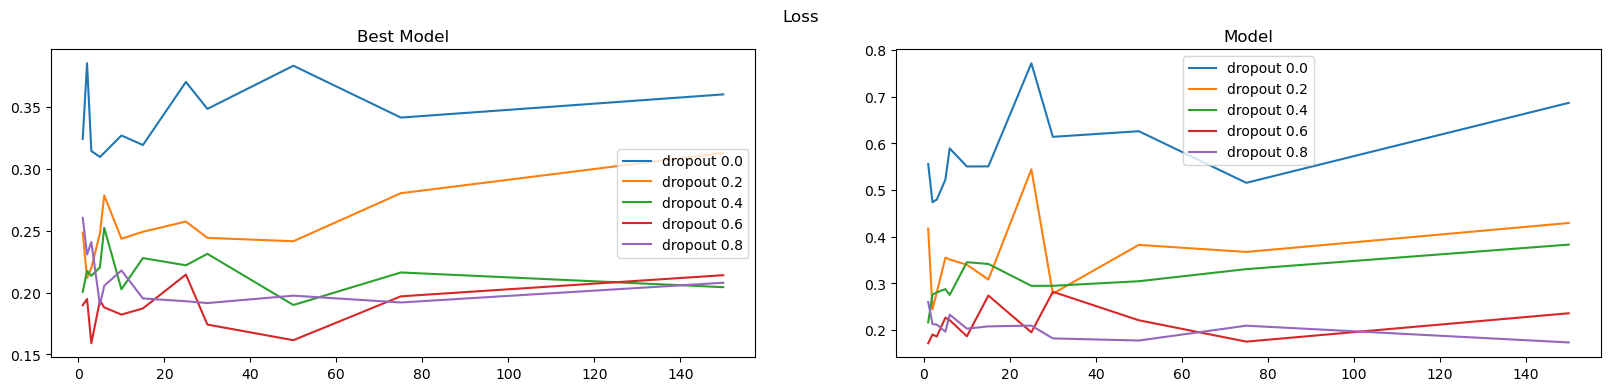

In [11]:
plt.figure(figsize=(20,4))

plt.suptitle('Loss')
plt.subplot(1, 2, 1)
plt.title('Best Model')
plt.plot(n_heads, drop_00['best_model_test_loss'], label='dropout 0.0')
plt.plot(n_heads, drop_02['best_model_test_loss'], label='dropout 0.2')
plt.plot(n_heads, drop_04['best_model_test_loss'], label='dropout 0.4')
plt.plot(n_heads, drop_06['best_model_test_loss'], label='dropout 0.6')
plt.plot(n_heads, drop_08['best_model_test_loss'], label='dropout 0.8')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Model')
plt.plot(n_heads, drop_00['test_loss'], label='dropout 0.0')
plt.plot(n_heads, drop_02['test_loss'], label='dropout 0.2')
plt.plot(n_heads, drop_04['test_loss'], label='dropout 0.4')
plt.plot(n_heads, drop_06['test_loss'], label='dropout 0.6')
plt.plot(n_heads, drop_08['test_loss'], label='dropout 0.8')

plt.legend()
plt.show()

In [12]:
grouping = df.groupby(['n_heads', 'drop_rate'])
grouping.first()

train_acc  test_acc  train_loss  test_loss  \
n_heads drop_rate                                               
1       0.0           1.0000  0.906314      0.0002   0.555753   
        0.2           0.9920  0.914460      0.0268   0.417453   
        0.4           0.9765  0.936864      0.0669   0.216817   
        0.6           0.9548  0.934827      0.1401   0.171814   
        0.8           0.8087  0.920570      0.5304   0.260215   
2       0.0           0.9892  0.910387      0.0342   0.473923   
        0.2           0.9927  0.938900      0.0278   0.244536   
        0.4           0.9776  0.940937      0.0705   0.276169   
        0.6           0.9447  0.936864      0.1616   0.190549   
        0.8           0.8468  0.926680      0.4240   0.212862   
3       0.0           0.9951  0.916497      0.0146   0.479730   
        0.2           0.9925  0.936864      0.0212   0.280476   
        0.4           0.9873  0.928717      0.0385   0.280756   
        0.6           0.9631  0.942974      0.1173   0.186335   
        0.8           0.8572  0.922607      0.4032   0.211907   
5       0.0           0.9896  0.912424      0.0352   0.522238   
        0.2           0.9918  0.922607      0.0254   0.355430   
        0.4           0.9861  0.938900      0.0465   0.287873   
        0.6           0.9607  0.938900      0.1162   0.226684   
        0.8           0.8687  0.928717      0.3632   0.196647   
6       0.0           0.9991  0.918534      0.0029   0.589192   
        0.2           0.9887  0.916497      0.0352   0.351174   
        0.4           0.9880  0.934827      0.0441   0.275394   
        0.6           0.9586  0.934827      0.1242   0.221326   
        0.8           0.8696  0.922607      0.3575   0.233046   
10      0.0           1.0000  0.914460      0.0001   0.550566   
        0.2           0.9906  0.932790      0.0300   0.340127   
        0.4           0.9901  0.914460      0.0320   0.345475   
        0.6           0.9666  0.945010      0.1065   0.186810   
        0.8           0.8692  0.922607      0.3694   0.203133   
15      0.0           1.0000  0.906314      0.0001   0.550686   
        0.2           0.9911  0.940937      0.0280   0.308303   
        0.4           0.9885  0.920570      0.0371   0.341737   
        0.6           0.9633  0.934827      0.1090   0.274070   
        0.8           0.8807  0.930754      0.3469   0.208035   
25      0.0           1.0000  0.904277      0.0000   0.771567   
        0.2           0.9927  0.908350      0.0248   0.544374   
        0.4           0.9878  0.936864      0.0376   0.294810   
        0.6           0.9708  0.928717      0.0835   0.195301   
        0.8           0.8746  0.926680      0.3505   0.209631   
30      0.0           1.0000  0.902240      0.0001   0.614007   
        0.2           0.9927  0.936864      0.0308   0.278168   
        0.4           0.9899  0.926680      0.0319   0.294933   
        0.6           0.9638  0.930754      0.1120   0.282111   
        0.8           0.8816  0.947047      0.3353   0.182234   
50      0.0           1.0000  0.912424      0.0001   0.626066   
        0.2           0.9939  0.918534      0.0215   0.382600   
        0.4           0.9840  0.922607      0.0493   0.304716   
        0.6           0.9593  0.924644      0.1160   0.221088   
        0.8           0.8755  0.934827      0.3358   0.177721   
75      0.0           1.0000  0.910387      0.0001   0.515480   
        0.2           0.9944  0.938900      0.0176   0.367427   
        0.4           0.9845  0.924644      0.0467   0.330650   
        0.6           0.9678  0.945010      0.1011   0.175377   
        0.8           0.8814  0.916497      0.3383   0.209487   
150     0.0           0.9925  0.898167      0.0183   0.686768   
        0.2           0.9936  0.902240      0.0202   0.429440   
        0.4           0.9880  0.924644      0.0386   0.383155   
        0.6           0.9626  0.920570      0.1127   0.236104   
        0.8           0.8755  0.945010      0.3488   0

In [13]:
aggregated_data = df.groupby(['n_heads']).agg(
    best_model=('test_acc', 'max'),
)
aggregated_data

,best_model
n_heads,
1,0.936864
2,0.940937
3,0.942974
5,0.938900
6,0.934827
10,0.945010
15,0.940937
25,0.936864
30,0.947047


In [14]:
df.groupby(['drop_rate', 'n_heads'])['test_acc'].max()

drop_rate  n_heads
0.0        1          0.906314
           2          0.910387
           3          0.916497
           5          0.912424
           6          0.918534
           10         0.914460
           15         0.906314
           25         0.904277
           30         0.902240
           50         0.912424
           75         0.910387
           150        0.898167
0.2        1          0.914460
           2          0.938900
           3          0.936864
           5          0.922607
           6          0.916497
           10         0.932790
           15         0.940937
           25         0.908350
           30         0.936864
           50         0.918534
           75         0.938900
           150        0.902240
0.4        1          0.936864
           2          0.940937
           3          0.928717
           5          0.938900
           6          0.934827
           10         0.914460
           15         0.920570
           25       

In [15]:
best_by_head = df.loc[df.groupby('n_heads')['test_acc'].idxmax()][['n_heads', 'drop_rate', 'test_acc']]
best_by_head

,n_heads,drop_rate,test_acc
2,1,0.4,0.936864
7,2,0.4,0.940937
13,3,0.6,0.942974
17,5,0.4,0.938900
22,6,0.4,0.934827
28,10,0.6,0.945010
31,15,0.2,0.940937
37,25,0.4,0.936864
44,30,0.8,0.947047
49,50,0.8,0.934827


In [16]:
best_by_head = df.loc[df.groupby('n_heads')['best_model_test_acc'].idxmax()][['n_heads', 'drop_rate', 'best_model_test_acc']]
best_by_head

,n_heads,drop_rate,best_model_test_acc
2,1,0.4,0.934827
6,2,0.2,0.934827
13,3,0.6,0.938900
18,5,0.6,0.936864
23,6,0.6,0.928717
27,10,0.4,0.936864
34,15,0.8,0.928717
39,25,0.8,0.934827
43,30,0.6,0.940937
48,50,0.6,0.947047
